In [54]:
import statsmodels.api as sm
import statsmodels.stats as sms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.graphics.regressionplots as iplt
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
credit_card = sm.datasets.ccard.load_pandas().data

In [4]:
credit_card.head()

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0


/home/jesse/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


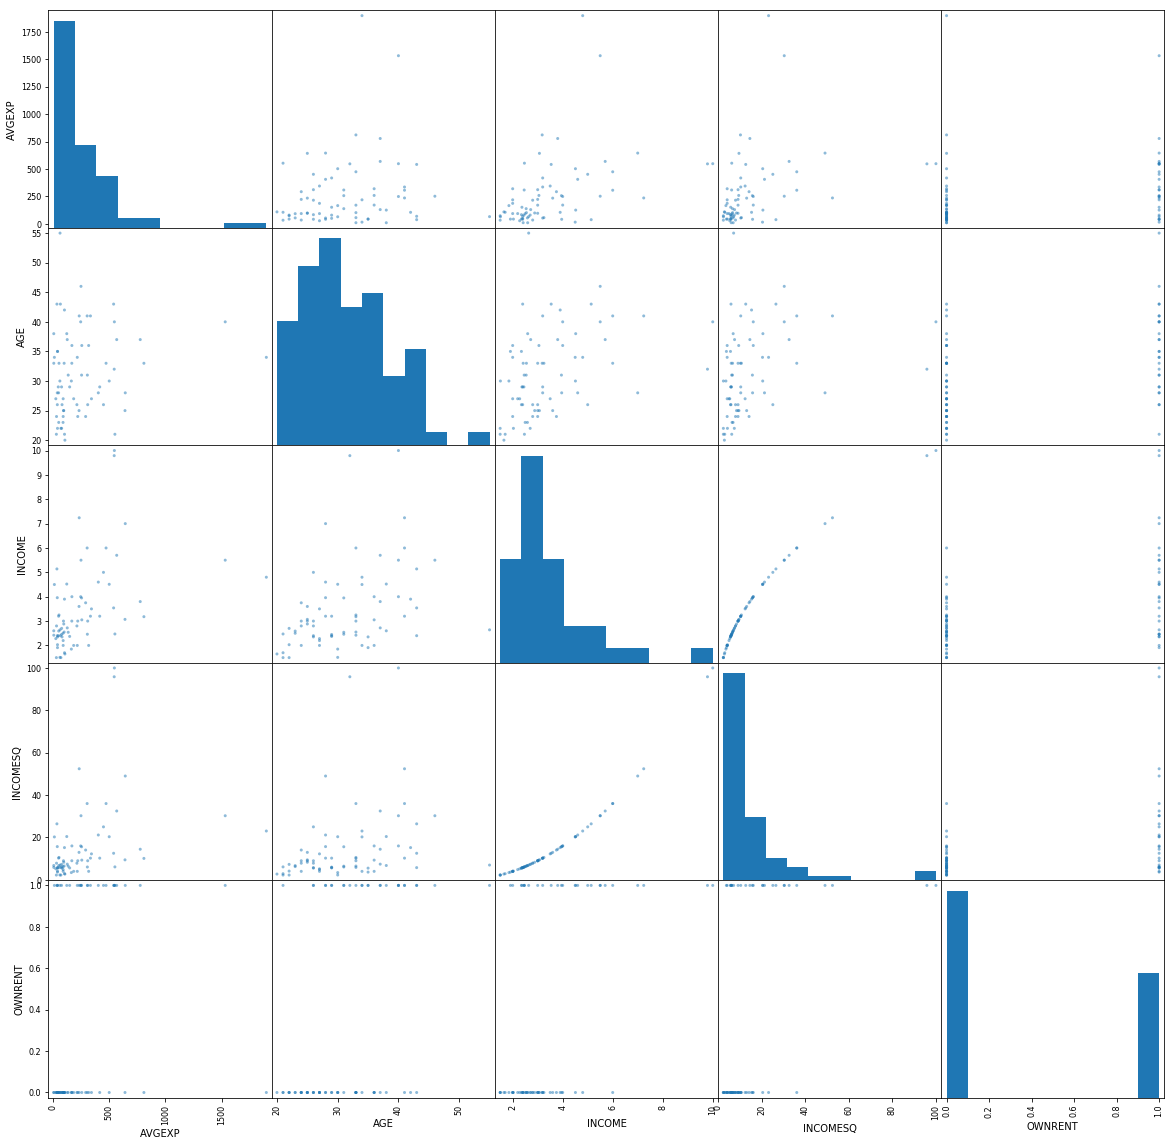

In [13]:
pd.scatter_matrix(credit_card, figsize = (20,20))
plt.show()

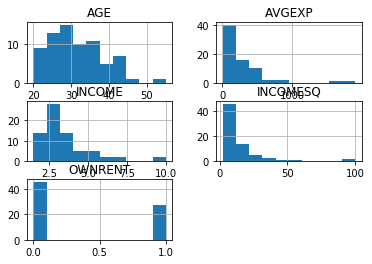

In [11]:
credit_card.hist()
plt.show()

In [14]:
credit_card.columns

Index(['AVGEXP', 'AGE', 'INCOME', 'INCOMESQ', 'OWNRENT'], dtype='object')

In [57]:
mod = sm.OLS(credit_card['AVGEXP'], credit_card[['AGE', 'INCOME', 'INCOMESQ', 'OWNRENT']])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AVGEXP   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     20.22
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           5.24e-11
Time:                        13:02:33   Log-Likelihood:                -507.24
No. Observations:                  72   AIC:                             1022.
Df Residuals:                      68   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -6.8112      4.551     -1.497      0.1

In [21]:
mod1 = sm.OLS(prestige['prestige'], prestige[['income', 'education']])
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     377.6
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           5.30e-28
Time:                        11:20:08   Log-Likelihood:                -180.04
No. Observations:                  45   AIC:                             364.1
Df Residuals:                      43   BIC:                             367.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
income         0.5483      0.116      4.743      0.0

In [19]:
prestige.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


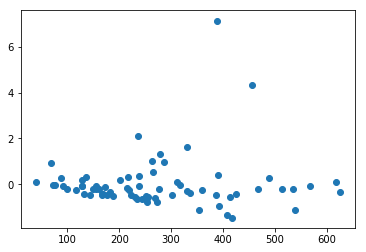

In [31]:
plt.scatter(res.fittedvalues, (res.outlier_test()['student_resid']))
plt.show()

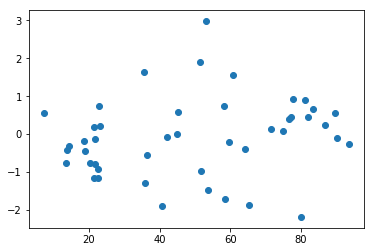

In [32]:
plt.scatter(res1.fittedvalues, (res1.outlier_test()['student_resid']))
plt.show()

In [37]:
sm.stats.het_goldfeldquandt(res1.resid, res1.model.exog)

(0.46472582378043903, 0.95396328162213906, 'increasing')

In [38]:
sm.stats.het_goldfeldquandt(res.resid, res.model.exog)

(1.4202497795783549, 0.16302616658239308, 'increasing')

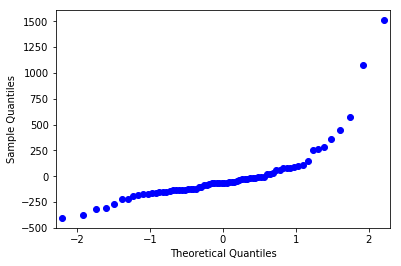

In [39]:
sm.qqplot(res.resid)

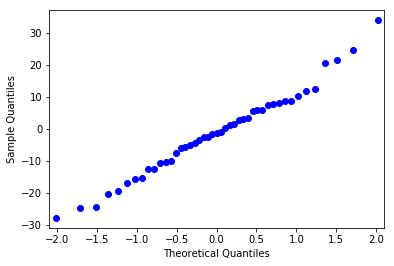

In [40]:
sm.qqplot(res1.resid)

In [52]:
X = credit_card[['AGE','INCOME','INCOMESQ','OWNRENT']]
[sms.outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

[18.80323323554143, 52.577599135439549, 16.751357340627997, 2.1205720422891385]

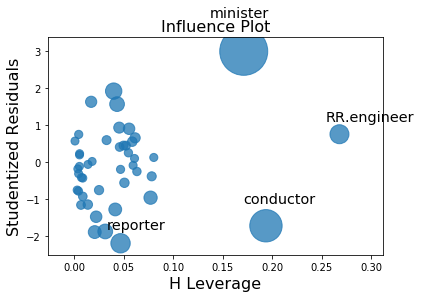

In [55]:
iplt.influence_plot(res1)

In [ ]:
df_ethnicity  = pd.get_dummies(df.Ethnicity)
df = pd.concat([df, df_ethnicity], axis=1)
df =  df.drop(['Ethnicity', 'African American'], axis=1)

gender = {' Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].apply(lambda x: gender[x])